### Задача 1 – Умножение матриц

Напишите функцию для умножения матриц, используя только списки и циклы.

Не забывайте проверить, что умножение выполнить возможно.
Напомним, что две матрицы могут быть перемножены, если число столбцов первой матрицы равно числу строк второй матрицы. Если матрица
$A$ имеет размер $m×n$ ($m$ строк и $nя$ столбцов), а матрица $B$ имеет размер $n×p$, то их произведение $C=AB$ будет иметь размер $m×p$.

Если $A=(a_{ij})$ — матрица размера $m×n$, а $B=(b_{jk})$ — матрица размера $n×p$, то элемент $c_{ik}$ матрицы $C=AB$ вычисляется по формуле:

$$c_{ik}=\sum_{j=1}^{n}a_{ij}b_{jk}$$

То есть каждый элемент новой матрицы является суммой произведений соответствующих элементов строки первой матрицы и столбца второй.

In [ ]:
import numpy as np

matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

print("Произведение матриц:")
matrix1 @ matrix2

Произведение матриц:


array([[ 30,  24,  18],
       [ 84,  69,  54],
       [138, 114,  90]])

In [ ]:
A = ([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = ([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

In [ ]:
def multiply_matrices(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Матрицы нельзя перемножить")

    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

    # Перемножение матриц
    for i in range(len(A)):
        for k in range(len(B[0])):
            for j in range(len(B)):
                result[i][k] += A[i][j] * B[j][k]

    return result

In [ ]:
result = multiply_matrices(A, B)
for row in result:
    print(row)

[30, 24, 18]
[84, 69, 54]
[138, 114, 90]


### Задача 2 – Функции

Дано две функции:

\begin{matrix} F(x) = a_{11}x^2 + a_{12}x + a_{13}&(1) \\ P(x) = a_{21}x^2+a_{22}x + a_{23} &(2) \end{matrix}
​
* На вход программа должна принимать 2 строки. Каждая строка содержит 3 действительных числа через пробел: коэффициенты $a$.
* Необходимо найти точки экстремума функций (например, через функцию [`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html), [`fmin()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) и др.) и определить, есть ли у функций общие решения при введенных коэффициентах на некотором диапазоне значений $x$, предусмотрев ситуации, когда решения есть, решений нет и решений бесконечно много.


In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar


Функции для нахождения экстремума


In [ ]:
def F(x, a11, a12, a13):
    return a11 * x**2 + a12 * x + a13

def P(x, a21, a22, a23):
    return a21 * x**2 + a22 * x + a23

In [ ]:
a1 = list(map(float, input("Введите коэффициенты для функции F(x): ").split()))
a2 = list(map(float, input("Введите коэффициенты для функции P(x): ").split()))

Введите коэффициенты для функции F(x): 1 -3 2
Введите коэффициенты для функции P(x): 1 -2 1


In [ ]:
res_F = minimize_scalar(F, args=(a1[0], a1[1], a1[2]))
res_P = minimize_scalar(P, args=(a2[0], a2[1], a2[2]))


In [ ]:
print(f"Экстремум функции F(x): x = {res_F.x}, значение = {res_F.fun}")
print(f"Экстремум функции P(x): x = {res_P.x}, значение = {res_P.fun}")

Экстремум функции F(x): x = 1.4999999999999998, значение = -0.24999999999999956
Экстремум функции P(x): x = 1.0, значение = 0.0


Ищем точки пересечения функций F(x) = P(x)

In [ ]:
coeff_diff = [a1[0] - a2[0], a1[1] - a2[1], a1[2] - a2[2]]
roots = np.roots(coeff_diff)

if len(roots) == 0:
    print("Общих решений нет.")
elif len(roots) == 1:
    print(f"Общее решение: x = {roots[0]}")
else:
    print(f"Общие решения: x1 = {roots[0]}, x2 = {roots[1]}")


Общее решение: x = 1.0


In [ ]:
if all(np.isclose(coeff, 0) for coeff in coeff_diff):
    print("Решений бесконечно много.")

### Задача 3 – Коэффициент асимметрии и эксцесса

Напишите функцию, которая для случайной выборки рассчитывает коэффициенты асимметрии и эксцесса.

Коэффициент асимметрии:

$$A_3=\frac{m_3}{\sigma^3}$$

Коэффициент эксцесса:

$$E_4=\frac{m_4}{\sigma^4}-3$$

С помощью этих коэффициентов можно прикинуть, насколько близко распределение выборки к нормальному. Для расчета этих коэффициентов понадобится рассчитать центральные моменты третьего ($m_3$) и четвертого ($m_4$) порядка. Основные формулы, которые понадобятся для расчетов:
1. Момент второго порядка (он же – дисперсия):
$$m_2=D_e=\frac{∑(x_i-\overline{x_e})^2\times n_i}{n}$$
2. Момент третьего порядка:
$$m_3=\frac{∑(x_i-\overline{x_e})^3\times n_i}{n}$$
3. Момент четвертого порядка:
$$m_4=\frac{∑(x_i-\overline{x_e})^4\times n_i}{n}$$

В формулах выше $\overline{x_e}$ – это выборочное среднее.
$$\overline{x_e}=\frac{∑(x_i\times n_i)}{n},$$
где $x_i$ – $i$-е значение из выборки, $n_i$ – число раз, когда $x_i$ встретилось в выборке, $n$ – объем выборки.


Проверить корректность расчетов можно с помощью функции [`kurtosis`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) для коэффициента эксцесса и функции [`skew`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) из `scipy`.

**Коэффициент асимметрии** количественно определяет степень асимметрии распределения. Он показывает, в какую сторону распределение скошено относительно своего среднего значения.

1. Если коэффициент асимметрии больше 0, это означает, что "длинная часть" распределения находится справа от среднего (правостороннее распределение). Это может указывать на наличие выбросов или значений, превышающих среднее.
2. Если коэффициент меньше 0, "длинная часть" находится слева от среднего (левостороннее распределение). Это может свидетельствовать о большем количестве низких значений.
3. Коэффициент равен 0, что указывает на симметрию вокруг среднего значения.



**Эксцесс** измеряет остроту распределения по сравнению с нормальным распределением и показывает, насколько вероятны выбросы в данных.

1. Если эксцесс положителен (больше 0), это указывает на более острый пик и более тяжелые хвосты по сравнению с нормальным распределением. Это означает, что в данных больше выбросов.
2. Если эксцесс равен 0, это соответствует нормальному распределению, где пики и хвосты находятся на стандартном уровне.
3. Если эксцесс отрицателен (меньше 0), это говорит о более плоском пике и легких хвостах, что указывает на меньшую вероятность выбросов.

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew

In [ ]:
kurtosis([2,3,5,7,8]), skew([2,3,5,7,8])

(-1.56508875739645, 0.0)

In [ ]:
kurtosis([2,3,2,5,7,2,2,8]), skew([2,3,2,5,7,2,2,8])

(-1.1002728454980493, 0.7565586244407938)

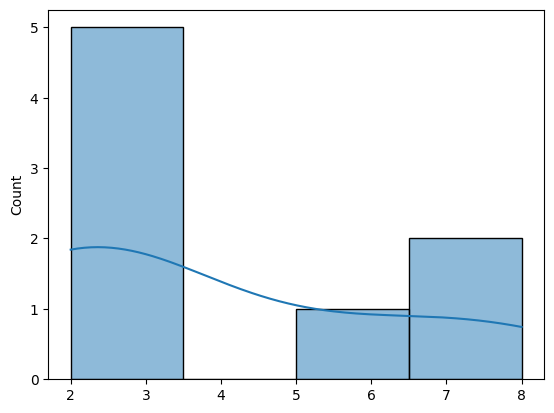

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([2,3,2,5,7,2,2,8], kde=True);

In [ ]:
def calculate_moments(data):
    # Выборочное среднее
    mean = np.mean(data)

    # Момент второго порядка (дисперсия)
    m2 = np.mean((data - mean) ** 2)

    # Момент третьего порядка
    m3 = np.mean((data - mean) ** 3)

    # Момент четвертого порядка
    m4 = np.mean((data - mean) ** 4)

    return m2, m3, m4

In [ ]:
def calculate_asymmetry_and_kurtosis(data):
    m2, m3, m4 = calculate_moments(data)

    # Стандартное отклонение
    sigma = np.sqrt(m2)

    # Коэффициент асимметрии
    A3 = m3 / (sigma ** 3)

    # Коэффициент эксцесса
    E4 = (m4 / (sigma ** 4)) - 3

    return A3, E4

In [ ]:
# Проверка правильности с использованием функций из scipy
def check_results(data):
    scipy_skew = skew(data)
    scipy_kurtosis = kurtosis(data)

    print(f"Проверка с использованием scipy:")
    print(f"Коэффициент асимметрии (skew): {scipy_skew}")
    print(f"Коэффициент эксцесса (kurtosis): {scipy_kurtosis}")

In [ ]:
data = [2, 3, 5, 7, 11, 13, 17, 19]

# Вычисление коэффициентов
A3, E4 = calculate_asymmetry_and_kurtosis(data)

print(f"Коэффициент асимметрии: {A3}")
print(f"Коэффициент эксцесса: {E4}")

# Проверка результатов
check_results(data)

Коэффициент асимметрии: 0.24286309509616755
Коэффициент эксцесса: -1.3722699105933058
Проверка с использованием scipy:
Коэффициент асимметрии (skew): 0.24286309509616752
Коэффициент эксцесса (kurtosis): -1.372269910593306


### Куда и как сдавать работу?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**